## Music Recommendation System

In [9]:
#Importing all the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [10]:
df = pd.read_csv('Music data.csv', index_col=0)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


### Creating a scatter plot based on the songs valence and danceability.

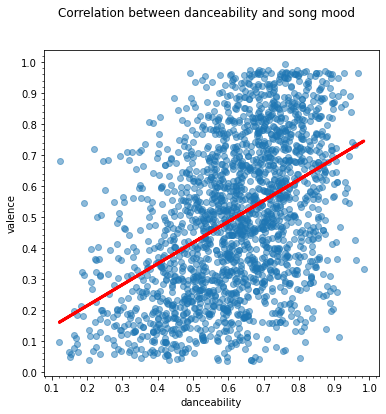

In [11]:
x = df["danceability"].values
y = df["valence"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

#Using linear regression to find their correlation.

reg = linear_model.LinearRegression()
reg.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and song mood")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, reg.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("danceability")
plt.ylabel("valence")

plt.show()

### Distrubition of songs based on their energy levels.

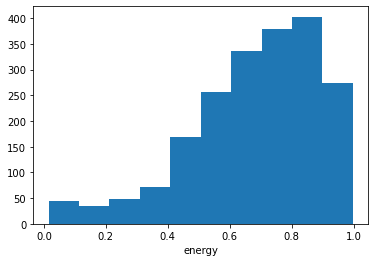

In [12]:
plt.hist(df['energy'])
plt.xlabel("energy")
plt.show()

### Heatmap to show the no. of songs found at all values of valence and danceability.

KeyError: "None of [Index([             (0.833,),              (0.743,),              (0.838,),\n                    (0.494,), (0.6779999999999999,),              (0.804,),\n       (0.7390000000000001,),              (0.266,),              (0.603,),\n                    (0.836,),\n       ...\n                    (0.639,), (0.6459999999999999,),              (0.595,),\n                    (0.624,),              (0.528,),              (0.584,),\n                    (0.894,),              (0.637,),              (0.557,),\n                    (0.446,)],\n      dtype='object', length=2017)] are in the [columns]"

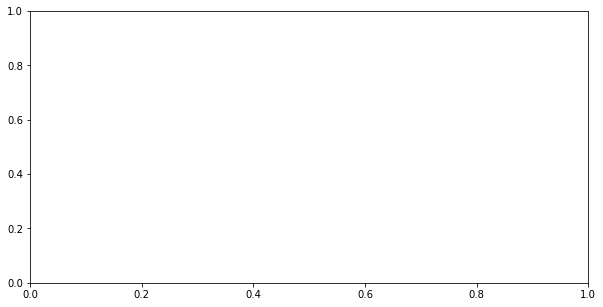

In [15]:
fig, (ax2) = plt.subplots(1, sharey=False, sharex=False, figsize=(10, 5))
h = ax2.hist2d(df[x], df[y], bins=20)

ax2.set_xlabel(x)
ax2.set_ylabel(y)


plt.colorbar(h[3], ax=ax2)

plt.show()

### Generating a list of traits and reducing the dimentionality to 3 using PCA.


In [17]:
chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = df["artist"] + " - " + df["song_title"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = df[chosen].values
y = df["danceability"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)


In [18]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")

Note: you may need to restart the kernel to use updated packages.
